# Importing necessary classes and packages

In [34]:
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

# Listing the classes used in train and test directories

In [35]:
os.listdir('/content/drive/MyDrive/Data/cervical fracture/train')

['fracture', 'normal']

In [36]:
os.listdir('/content/drive/MyDrive/Data/cervical fracture/val')

['normal', 'fracture']

In [37]:
datadir='/content/drive/MyDrive/Data/cervical fracture/train'

# Loading the images for training

In [38]:
x_train=[]
y_train=[]
Categories=['fracture', 'normal']
for i in Categories:
  print("Loading......",i)
  path=os.path.join(datadir,i)
  # print(path)
  images=os.listdir(path)
  # print(images)
  for img in images:
    img_path=os.path.join(path,img)
    # print(img_path)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1))
    x_train.append(img_resized)
    y_train.append(Categories.index(i))
  print("Completed.......",i)

Loading...... fracture
Completed....... fracture
Loading...... normal
Completed....... normal


In [39]:
img_arr.shape

(224, 224, 3)

In [40]:
img_resized.shape

(150, 150, 1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
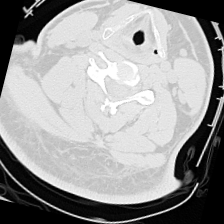

In [41]:
img_arr

In [42]:
img_resized

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

# Loading the images for testing

In [43]:
x_test=[]
y_test=[]
Categories=['fracture', 'normal']
datadir='/content/drive/MyDrive/Data/cervical fracture/val'
for i in Categories:
  print("Loading......",i)
  path=os.path.join(datadir,i)
  # print(path)
  images=os.listdir(path)
  # print(images)
  for img in images:
    img_path=os.path.join(path,img)
    # print(img_path)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1))
    x_test.append(img_resized)
    y_test.append(Categories.index(i))
  print("Completed.......",i)

Loading...... fracture
Completed....... fracture
Loading...... normal
Completed....... normal


# Converting these datas to array

In [44]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [45]:
x_train.shape

(3800, 150, 150, 1)

In [46]:
x_test.shape

(400, 150, 150, 1)

# Adding input, pooling, convolution,flatten, hidden, and output layers for CNN

In [47]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))

# Compiling the model

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Fitting the model

In [49]:
model.fit(x_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
190/190 [==============================] - 4s 10ms/step - loss: 0.1153 - accuracy: 0.9518
Epoch 2/20
190/190 [==============================] - 2s 9ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 3/20
190/190 [==============================] - 2s 9ms/step - loss: 0.0028 - accuracy: 0.9995
Epoch 4/20
190/190 [==============================] - 2s 9ms/step - loss: 0.0144 - accuracy: 0.9963
Epoch 5/20
190/190 [==============================] - 2s 9ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 6/20
190/190 [==============================] - 2s 9ms/step - loss: 1.2519e-04 - accuracy: 1.0000
Epoch 7/20
190/190 [==============================] - 2s 10ms/step - loss: 6.8317e-05 - accuracy: 1.0000
Epoch 8/20
190/190 [==============================] - 2s 10ms/step - loss: 3.3230e-05 - accuracy: 1.0000
Epoch 9/20
190/190 [==============================] - 2s 9ms/step - loss: 2.0213e-05 - accuracy: 1.0000
Epoch 10/20
190/190 [==============================] - 2s 9ms/step - loss: 1.3098

# Evaluating loss and accuracy of the test datas

In [50]:
loss,accuracy=model.evaluate(x_test,y_test)
print("Loss:",loss)
print("Accuracy:",accuracy)

13/13 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 1.0000
Loss: 0.007145884446799755
Accuracy: 1.0


# Reading an image from the test directory

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
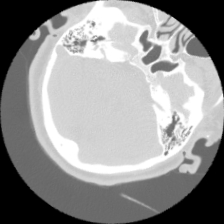

In [51]:
img=imread('/content/drive/MyDrive/Data/cervical fracture/val/fracture/CSFDV1B10 (1)-rotated3-rotated1.png')
img

# Resizing the image

In [52]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

# Reshaping the image

In [53]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

# Predicting the output of the image

In [54]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 59ms/step


array([[0.88841784, 0.11158217]], dtype=float32)

# Predicting the index having the highest value

In [55]:
ind=pred.argmax(axis=1)
ind.item()

0

# Printing the value of that index which is the class that image belongs to

In [56]:
print("Cervical Fracture Status:",Categories[ind.item()])

Cervical Fracture Status: fracture


In [57]:
# import pickle
# pickle.dump(model,open('model_fracture.h5','wb'))

# Saving the model

In [58]:
model.save('model_fracture2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
